# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import io
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords, twitter_samples
# from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import KFold
from nltk.stem import PorterStemmer
from string import punctuation
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import statistics
import plotly.express as px
import matplotlib
from sklearn.preprocessing import LabelEncoder
from itertools import cycle, islice

%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False
# nltk.download('twitter_samples')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning:

Config option `use_jedi` not recognized by `IPCompleter`.



# **Import Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

df_inicial = pd.read_csv(io.BytesIO(uploaded['metadata.csv']))

Saving metadata.csv to metadata (1).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#data = pd.read_csv('metadata.csv', engine='python',encoding='utf-8', error_bad_lines=False)
#print(data.shape)
#data.head()

# **Data Understanding**

In [ ]:
#Information about dataset
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599616 entries, 0 to 599615
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          599616 non-null  object 
 1   sha               199944 non-null  object 
 2   source_x          599616 non-null  object 
 3   title             599314 non-null  object 
 4   doi               321299 non-null  object 
 5   pmcid             209272 non-null  object 
 6   pubmed_id         276662 non-null  object 
 7   license           599616 non-null  object 
 8   abstract          439217 non-null  object 
 9   publish_time      599397 non-null  object 
 10  authors           583994 non-null  object 
 11  journal           560554 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  257510 non-null  object 
 14  arxiv_id          7841 non-null    object 
 15  pdf_json_files    199944 non-null  object 
 16  pmc_json_files    16

In [ ]:
#duplicated values
df_inicial.duplicated().sum()

0

In [ ]:
#missing values
df_inicial.isnull().sum()

cord_uid                 0
sha                 399672
source_x                 0
title                  302
doi                 278317
pmcid               390344
pubmed_id           322954
license                  0
abstract            160399
publish_time           219
authors              15622
journal              39062
mag_id              599616
who_covidence_id    342106
arxiv_id            591775
pdf_json_files      399672
pmc_json_files      437663
url                 255863
s2_id                52771
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



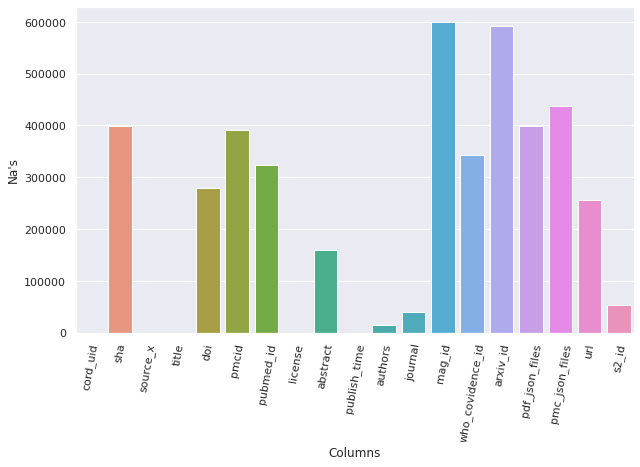

In [ ]:
#Visualize missing using plot

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = df_inicial.columns
y = df_inicial.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x,y)
ax = plt.gca()

ax.set_xlabel("Columns")
ax.set_ylabel("Na's")
plt.xticks(rotation=80)

plt.show()

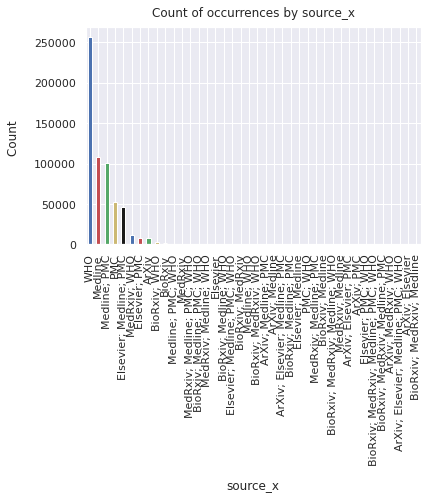

In [ ]:
my_colors = list(islice(cycle(['b','r','g','y','k']),None, len(df_inicial)))
df_inicial.value_counts('source_x').plot(kind='bar', color=my_colors)
plt.xlabel("source_x", labelpad=14)
plt.ylabel("Count ", labelpad=14)
plt.title("Count of occurrences by source_x", y=1.02);



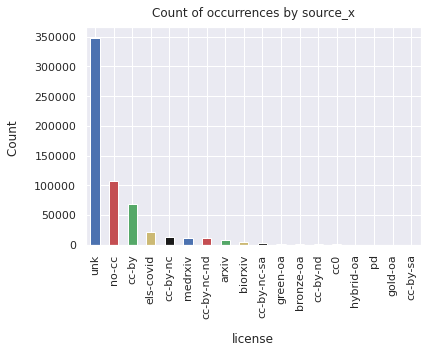

In [ ]:
my_colors = list(islice(cycle(['b','r','g','y','k']),None, len(df_inicial)))
df_inicial.value_counts('license').plot(kind='bar', color=my_colors)
plt.xlabel("license", labelpad=14)
plt.ylabel("Count ", labelpad=14)
plt.title("Count of occurrences by source_x", y=1.02);

In [ ]:
#Number authors by journal
topn=15
grp = df_inicial.groupby(["journal"]).agg({'authors':'count'})
grp
grp_order = grp.sort_values(by=["authors"], ascending=False).head(topn)
grp_order

,authors
journal,
bioRxiv,5589
PLoS One,5553
BMJ,4888
Sci Rep,2885
Int J Environ Res Public Health,2802
Lancet,2178
Nature,2124
Journal of virology,1938
Cureus,1886


In [ ]:
#Number titles by journal
topn=15
grp = df_inicial.groupby(["journal"]).agg({'title':'count'})
grp
grp_order = grp.sort_values(by=["title"], ascending=False).head(topn)
grp_order

,title
journal,
bioRxiv,5589
PLoS One,5575
BMJ,5060
Sci Rep,2887
Int J Environ Res Public Health,2803
Nature,2413
Lancet,2369
Journal of virology,1940
JAMA,1924


In [ ]:
#Number titles by authors
topn=15
grp = df_inicial.groupby(["authors"]).agg({'title':'count'})
grp
grp_order = grp.sort_values(by=["title"], ascending=False).head(topn)
grp_order

,title
authors,
"Anonymous,",2046
"Mahase, Elisabeth",465
"Iacobucci, Gareth",365
"Rimmer, Abi",272
"Prevention, Centers for Disease Control and",207
"Wise, Jacqui",181
"Manus, Jean-Marie",174
"Organization, World Health",162
"Dyer, Owen",143


In [ ]:
#Number titles and authors by license
grp = df_inicial.groupby(["license"]).agg({'title':'count','authors':'count'})
grp
grp_order = grp.sort_values(by=["title","authors"], ascending=False)
grp_order

,title,authors
license,,
unk,348445,341564
no-cc,107867,101167
cc-by,68297,67784
els-covid,20761,19914
cc-by-nc,12547,12442
medrxiv,11638,11638
cc-by-nc-nd,11119,10973
arxiv,7717,7717
biorxiv,4649,4649


In [ ]:
#Number authors by journal
topn=15
grp = df_inicial.groupby(["journal", "authors"]).agg({'title':'count'})
grp
grp_order = grp.sort_values(by=["title"], ascending=False).head(topn)
grp_order

title
journal          authors                     
BMJ              Mahase, Elisabeth        449
                 Iacobucci, Gareth        355
                 Rimmer, Abi              263
                 Wise, Jacqui             177
                 Dyer, Owen               138
Rev Francoph Lab Manus, Jean-Marie        122
JAMA             Kuehn, Bridget M         104
BMJ              Dyer, Clare              104
                 Tanne, Janice Hopkins    102
JAMA             Rubin, Rita               92
BMJ              Torjesen, Ingrid          89
                 Oliver, David             88
Nature           Mallapaty, Smriti         84
BMJ              Griffin, Shaun            79
Science          Cohen, Jon                76